### Подключение библиотек и загрузка данных

In [7]:
import pandas as pd
import numpy as np
diabetes_df = pd.read_csv('diabetes_clean.csv')
print(diabetes_df.head(5))

   pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  \
0            6      148         72       35        0  33.6  0.627   50   
1            1       85         66       29        0  26.6  0.351   31   
2            8      183         64        0        0  23.3  0.672   32   
3            1       89         66       23       94  28.1  0.167   21   
4            0      137         40       35      168  43.1  2.288   33   

   diabetes  
0         1  
1         0  
2         1  
3         0  
4         1  


### Исключение аномальных значений

In [8]:
diabetes_df = diabetes_df[diabetes_df['bmi']>0]
diabetes_df = diabetes_df[diabetes_df['glucose']>0]

In [9]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 752 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  752 non-null    int64  
 1   glucose      752 non-null    int64  
 2   diastolic    752 non-null    int64  
 3   triceps      752 non-null    int64  
 4   insulin      752 non-null    int64  
 5   bmi          752 non-null    float64
 6   dpf          752 non-null    float64
 7   age          752 non-null    int64  
 8   diabetes     752 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 58.8 KB


### Разбивка данных на целевую переменную и массив признаков

In [10]:
X = diabetes_df.drop('glucose', axis=1).values
y = diabetes_df['glucose']

### Предсказание по одной переменной (BMI)

In [11]:
X_bmi = X[:, 4]
print(y.shape, X_bmi.shape)
print(X_bmi)

(752,) (752,)
[33.6 26.6 23.3 28.1 43.1 25.6 31.  35.3 30.5 37.6 38.  27.1 30.1 25.8
 30.  45.8 29.6 43.3 34.6 39.3 35.4 39.8 29.  36.6 31.1 39.4 23.2 22.2
 34.1 36.  31.6 24.8 19.9 27.6 24.  33.2 32.9 38.2 37.1 34.  40.2 22.7
 45.4 27.4 42.  29.7 28.  39.1 19.4 24.2 24.4 33.7 34.7 23.  37.7 46.8
 40.5 41.5 32.9 25.  25.4 32.8 29.  32.5 42.7 19.6 28.9 32.9 28.6 43.4
 35.1 32.  32.6 37.7 43.2 25.  22.4 29.3 24.6 48.8 32.4 36.6 38.5 37.1
 26.5 19.1 32.  46.7 23.8 24.7 33.9 31.6 20.4 28.7 49.7 39.  26.1 22.5
 26.6 39.6 28.7 22.4 29.5 34.3 37.4 33.3 34.  31.2 34.  30.5 31.2 34.
 33.7 28.2 23.2 53.2 34.2 33.6 26.8 33.3 55.  42.9 33.3 34.5 27.9 29.7
 33.3 34.5 38.3 21.1 33.8 30.8 28.7 31.2 36.9 21.1 39.5 32.5 32.4 32.8
 32.8 30.5 33.7 27.3 37.4 21.9 34.3 40.6 47.9 50.  24.6 25.2 29.  40.9
 29.7 37.2 44.2 29.7 31.6 29.9 32.5 29.6 31.9 28.4 30.8 35.4 28.9 43.5
 29.7 32.7 31.2 67.1 45.  39.1 23.2 34.9 26.8 27.6 35.9 30.1 32.  27.9
 31.6 22.6 33.1 30.4 52.3 24.4 39.4 24.3 22.9 34.8 30.9 31.  40.

In [12]:
X_bmi = X_bmi.reshape(-1,1)
print(X_bmi.shape)
print(X_bmi)

(752, 1)
[[33.6]
 [26.6]
 [23.3]
 [28.1]
 [43.1]
 [25.6]
 [31. ]
 [35.3]
 [30.5]
 [37.6]
 [38. ]
 [27.1]
 [30.1]
 [25.8]
 [30. ]
 [45.8]
 [29.6]
 [43.3]
 [34.6]
 [39.3]
 [35.4]
 [39.8]
 [29. ]
 [36.6]
 [31.1]
 [39.4]
 [23.2]
 [22.2]
 [34.1]
 [36. ]
 [31.6]
 [24.8]
 [19.9]
 [27.6]
 [24. ]
 [33.2]
 [32.9]
 [38.2]
 [37.1]
 [34. ]
 [40.2]
 [22.7]
 [45.4]
 [27.4]
 [42. ]
 [29.7]
 [28. ]
 [39.1]
 [19.4]
 [24.2]
 [24.4]
 [33.7]
 [34.7]
 [23. ]
 [37.7]
 [46.8]
 [40.5]
 [41.5]
 [32.9]
 [25. ]
 [25.4]
 [32.8]
 [29. ]
 [32.5]
 [42.7]
 [19.6]
 [28.9]
 [32.9]
 [28.6]
 [43.4]
 [35.1]
 [32. ]
 [32.6]
 [37.7]
 [43.2]
 [25. ]
 [22.4]
 [29.3]
 [24.6]
 [48.8]
 [32.4]
 [36.6]
 [38.5]
 [37.1]
 [26.5]
 [19.1]
 [32. ]
 [46.7]
 [23.8]
 [24.7]
 [33.9]
 [31.6]
 [20.4]
 [28.7]
 [49.7]
 [39. ]
 [26.1]
 [22.5]
 [26.6]
 [39.6]
 [28.7]
 [22.4]
 [29.5]
 [34.3]
 [37.4]
 [33.3]
 [34. ]
 [31.2]
 [34. ]
 [30.5]
 [31.2]
 [34. ]
 [33.7]
 [28.2]
 [23.2]
 [53.2]
 [34.2]
 [33.6]
 [26.8]
 [33.3]
 [55. ]
 [42.9]
 [33.3]
 [34.5]

### Просмотр данных

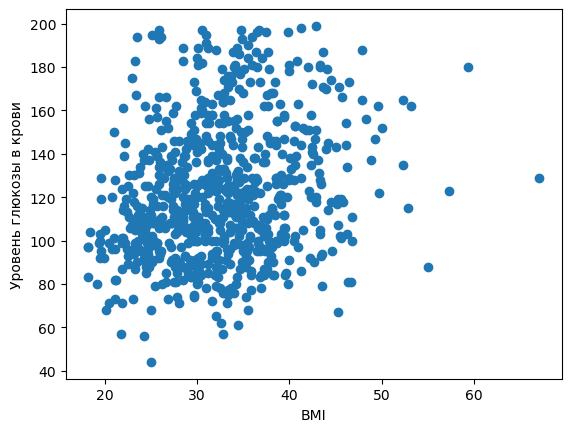

In [13]:
import matplotlib.pyplot as plt
plt.scatter(X_bmi, y)
plt.ylabel('Уровень глюкозы в крови')
plt.xlabel('BMI')
plt.show()

### Создание модели

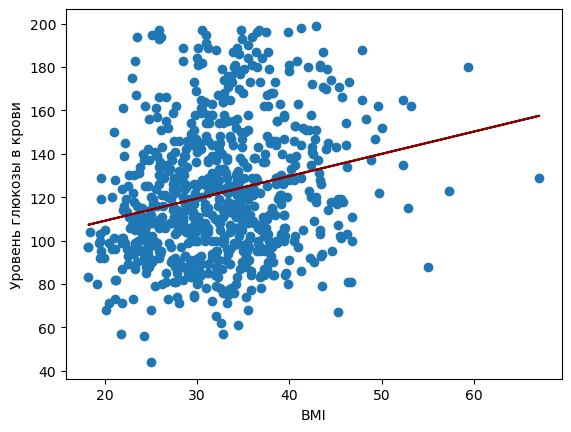

In [14]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_bmi, y)
predictions = reg.predict(X_bmi)
plt.scatter(X_bmi, y)
plt.plot(X_bmi, predictions, color='darkred')
plt.ylabel('Уровень глюкозы в крови')
plt.xlabel('BMI')
plt.show()

### Предсказание по одной переменной (инсулин)

In [18]:
diabetes_df = diabetes_df[diabetes_df['insulin']>0]

In [20]:
X = diabetes_df.drop('glucose', axis=1).values
y = diabetes_df['glucose']

In [21]:
X_in = X[:, 3]
print(y.shape, X_in.shape)
print(X_in)

(392,) (392,)
[ 94. 168.  88. 543. 846. 175. 230.  83.  96. 235. 146. 115. 140. 110.
 245.  54. 192. 207.  70. 240.  82.  36.  23. 300. 342. 304. 110. 142.
 128.  38. 100.  90. 140. 270.  71. 125.  71. 110. 176.  48.  64. 228.
  76.  64. 220.  40. 152. 140.  18.  36. 135. 495.  37. 175.  51. 100.
 100.  99. 135.  94. 145. 168. 225.  49. 140.  50.  92. 325.  63. 284.
 119. 204. 155. 485.  94. 135.  53. 114. 105. 285. 156.  78. 130.  48.
  55. 130. 130.  92. 495.  58. 114. 160.  94. 210.  48.  99. 318.  44.
 190. 280.  87. 130. 175. 271. 129. 120. 478. 190.  56.  32. 744.  53.
 370.  37.  45. 192.  88. 176. 194. 680. 402.  55. 258. 375. 150. 130.
  67.  56.  45.  57. 116. 278. 122. 155. 135. 545. 220.  49.  75.  40.
  74. 182. 194. 120. 360. 215. 184. 135.  42. 105. 132. 148. 180. 205.
 148.  96.  85.  94.  64. 140. 231.  29. 168. 156. 120.  68.  52.  58.
 255. 171. 105.  73. 108.  83.  74.  43. 167.  54. 249. 325. 293.  83.
  66. 140. 465.  66.  94. 158. 325.  84.  75.  72.  82. 182.  5

In [22]:
X_in = X_in.reshape(-1,1)
print(X_in.shape)
print(X_in)

(392, 1)
[[ 94.]
 [168.]
 [ 88.]
 [543.]
 [846.]
 [175.]
 [230.]
 [ 83.]
 [ 96.]
 [235.]
 [146.]
 [115.]
 [140.]
 [110.]
 [245.]
 [ 54.]
 [192.]
 [207.]
 [ 70.]
 [240.]
 [ 82.]
 [ 36.]
 [ 23.]
 [300.]
 [342.]
 [304.]
 [110.]
 [142.]
 [128.]
 [ 38.]
 [100.]
 [ 90.]
 [140.]
 [270.]
 [ 71.]
 [125.]
 [ 71.]
 [110.]
 [176.]
 [ 48.]
 [ 64.]
 [228.]
 [ 76.]
 [ 64.]
 [220.]
 [ 40.]
 [152.]
 [140.]
 [ 18.]
 [ 36.]
 [135.]
 [495.]
 [ 37.]
 [175.]
 [ 51.]
 [100.]
 [100.]
 [ 99.]
 [135.]
 [ 94.]
 [145.]
 [168.]
 [225.]
 [ 49.]
 [140.]
 [ 50.]
 [ 92.]
 [325.]
 [ 63.]
 [284.]
 [119.]
 [204.]
 [155.]
 [485.]
 [ 94.]
 [135.]
 [ 53.]
 [114.]
 [105.]
 [285.]
 [156.]
 [ 78.]
 [130.]
 [ 48.]
 [ 55.]
 [130.]
 [130.]
 [ 92.]
 [495.]
 [ 58.]
 [114.]
 [160.]
 [ 94.]
 [210.]
 [ 48.]
 [ 99.]
 [318.]
 [ 44.]
 [190.]
 [280.]
 [ 87.]
 [130.]
 [175.]
 [271.]
 [129.]
 [120.]
 [478.]
 [190.]
 [ 56.]
 [ 32.]
 [744.]
 [ 53.]
 [370.]
 [ 37.]
 [ 45.]
 [192.]
 [ 88.]
 [176.]
 [194.]
 [680.]
 [402.]
 [ 55.]
 [258.]
 [375.]

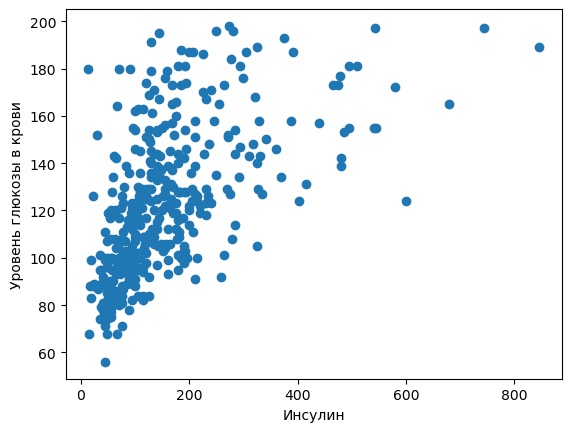

In [23]:
import matplotlib.pyplot as plt
plt.scatter(X_in, y)
plt.ylabel('Уровень глюкозы в крови')
plt.xlabel('Инсулин')
plt.show()

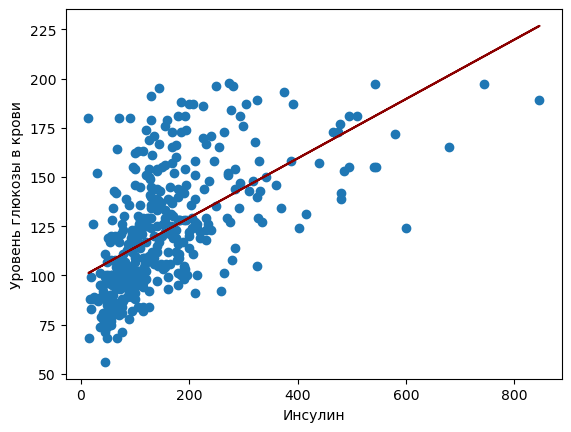

In [24]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_in, y)
predictions = reg.predict(X_in)
plt.scatter(X_in, y)
plt.plot(X_in, predictions, color='darkred')
plt.ylabel('Уровень глюкозы в крови')
plt.xlabel('Инсулин')
plt.show()

### Линейная модель для множества признаков

In [25]:
diabetes_df.describe()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2024)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train).coef_

array([ 0.09771689,  0.13971187, -0.02744192,  0.1196254 , -0.04894053,
        2.56317111,  0.40175329, 20.7428077 ])

In [34]:
y_pred = reg_all.predict(X_test)

### Оценка R^2

In [35]:
reg_all.score(X_test, y_test)

0.4255632165980445

### RMSE

In [39]:
from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(y_test, y_pred)

21.955618362310958

### Кросвалидация

In [40]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits = 12, shuffle=True, random_state=2024)
reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=kf)

In [41]:
print(cv_results)

[0.06730201 0.57274332 0.44976815 0.27134794 0.41337757 0.54300788
 0.28898849 0.4489935  0.48537193 0.40526747 0.53398808 0.70327803]


In [42]:
print(np.mean(cv_results), np.std(cv_results))

0.43195286422200646 0.15808890310582682


In [44]:
print(np.quantile(cv_results, [0.025,0.975] ))

[0.12341464 0.66738099]
